In [1]:
import tensorflow as tf # deep learning library.
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation
mnist = tf.keras.datasets.mnist  # mnist is a dataset of 28x28 images of handwritten digits
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data() # unpacks images to x_train/x_test and labels to y_train/y_test



In [6]:
import matplotlib.pyplot as plt
#print(x_train[0]) # printing first element
print(len(x_test))
x_train = x_train.reshape(60000,28,28,1)# DATA PRE-PROCESSING
x_test = x_test.reshape(10000,28,28,1)# DATA PRE-PROCESSING

10000


In [7]:
import matplotlib.pyplot as plt

#plt.imshow(x_train[0])
#plt.show() # Showing first image

In [8]:
x_train = tf.keras.utils.normalize(x_train, axis=1) # scales data between 0 and 1
x_test = tf.keras.utils.normalize(x_test, axis=1) # scales data between 0 and 1

In [9]:
#print(x_train[0])



In [10]:

model = tf.keras.models.Sequential() # a basic feed-forward model
model.add(Conv2D(64,(3,3), input_shape=x_train.shape[1:])) # convolution layer that will deal with our input images.
model.add(MaxPooling2D(pool_size=(2,2))) # add max pooling layer
model.add(Activation("relu")) # activation function for the layer

In [11]:
model.add(tf.keras.layers.Flatten()) # takes our 28x28 and makes it 1x784


In [12]:

model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # a simple fully-connected layer, 128 units, relu activation


In [13]:
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # our output layer. 10 units for 10 classes. Softmax for probability distribution


In [14]:
model.compile(optimizer='adam', #  optimizer 
              loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy']) # what to track


Train on 42000 samples, validate on 18000 samples
Epoch 1/5
42000/42000 [==============================] - 101s 2ms/step - loss: 0.0073 - acc: 0.9975 - val_loss: 0.1070 - val_acc: 0.9806
Epoch 2/5
42000/42000 [==============================] - 102s 2ms/step - loss: 0.0062 - acc: 0.9979 - val_loss: 0.1031 - val_acc: 0.9814
Epoch 3/5
42000/42000 [==============================] - 99s 2ms/step - loss: 0.0082 - acc: 0.9973 - val_loss: 0.1054 - val_acc: 0.9791
Epoch 4/5
42000/42000 [==============================] - 101s 2ms/step - loss: 0.0059 - acc: 0.9979 - val_loss: 0.1073 - val_acc: 0.9809
Epoch 5/5
42000/42000 [==============================] - 103s 2ms/step - loss: 0.0067 - acc: 0.9978 - val_loss: 0.0976 - val_acc: 0.9827


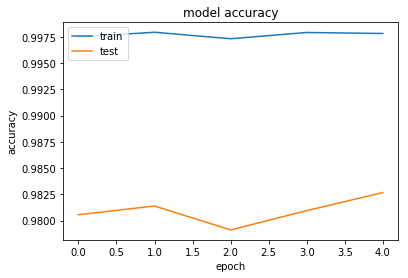

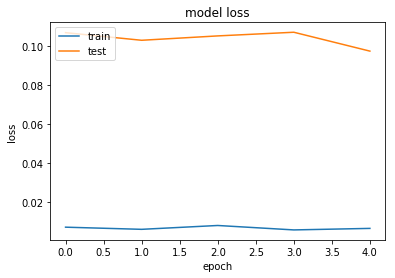

In [18]:
history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_split=0.3) # train the model



In [16]:
val_loss, val_acc = model.evaluate(x_test, y_test) # evaluate the out of sample data with model
print(val_loss) # model's loss (error)
print(val_acc) # model's accuracy

10000/10000 [==============================] - 4s 438us/step
0.06292242104099423
0.9826
